<a href="https://colab.research.google.com/github/sheikmohdimran/Experiments_2019/blob/master/NER_Pharma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!rm -rf *json
!unzip ibm_docs_anno.zip
import os
os.chdir('/content/ibm_docs_anno')

Archive:  ibm_docs_anno.zip
  inflating: ibm_docs_anno/8adea220-46fc-11e9-9df5-81b63344dbfe-0.json  
  inflating: ibm_docs_anno/8adea220-46fc-11e9-9df5-81b63344dbfe-1.json  
  inflating: ibm_docs_anno/8adea220-46fc-11e9-9df5-81b63344dbfe-10.json  
  inflating: ibm_docs_anno/8adea220-46fc-11e9-9df5-81b63344dbfe-11.json  
  inflating: ibm_docs_anno/8adea220-46fc-11e9-9df5-81b63344dbfe-12.json  
  inflating: ibm_docs_anno/8adea220-46fc-11e9-9df5-81b63344dbfe-13.json  
  inflating: ibm_docs_anno/8adea220-46fc-11e9-9df5-81b63344dbfe-14.json  
  inflating: ibm_docs_anno/8adea220-46fc-11e9-9df5-81b63344dbfe-15.json  
  inflating: ibm_docs_anno/8adea220-46fc-11e9-9df5-81b63344dbfe-16.json  
  inflating: ibm_docs_anno/8adea220-46fc-11e9-9df5-81b63344dbfe-17.json  
  inflating: ibm_docs_anno/8adea220-46fc-11e9-9df5-81b63344dbfe-18.json  
  inflating: ibm_docs_anno/8adea220-46fc-11e9-9df5-81b63344dbfe-19.json  
  inflating: ibm_docs_anno/8adea220-46fc-11e9-9df5-81b63344dbfe-2.json  
  inflating: 

In [0]:
import json
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
import glob

In [0]:
mylist = [f for f in glob.glob("*.json")]
final_df = pd.DataFrame()

l=0
for filename in mylist:
  x=filename.split('-')[-1].split('.')[0]
  with open(filename, 'r') as f:
    #print(filename)
    datastore = json.load(f)
    sentences=json_normalize(data=datastore['sentences'], record_path=['tokens'])
    mentions=json_normalize(datastore['mentions'])[['begin','end','type']]
    mentions['type']='B-'+mentions['type']
    j=mentions
    k='whiteSpace'
    for i in range(len(mentions)):
      sentences.loc[(sentences['end']>j.iloc[i,0]) & (sentences['end']<=j.iloc[i,1])
                    , k] = j.iloc[i,2]
  
  
    sentences.loc[(sentences.whiteSpace==False) , 'whiteSpace'] = 'O'
    sentences.id=x+sentences.id.str.replace('-t[0-9]+', '')
    ## Delete References
    a=sentences[sentences.text.str.upper()=='REFERENCES']
    ## Handle Documents without references
    if a.empty:
      a=sentences.iloc[-1,1]
    else:
      a=a.iloc[0,1]

    final_df=final_df.append(sentences[(sentences.end)<a])
    
final_df.reset_index(inplace=True)

In [0]:
def comp_prev(a):
    return np.concatenate(([False],a[1:] == a[:-1]))

final_df['match'] = comp_prev(final_df.whiteSpace.values)
final_df.match=final_df[final_df['match']].whiteSpace.str.replace('B-', 'I-')
final_df.match.fillna(final_df.whiteSpace, inplace=True)
final_df = final_df.drop(columns="whiteSpace")
final_df = final_df.rename(columns={"match": "whiteSpace"})

#final_df.whiteSpace.unique()

In [0]:
#final_df.loc[(final_df.whiteSpace=='B-ArticleTitle') , 'whiteSpace'] = 'O'
#final_df.loc[(final_df.whiteSpace=='B-JournalName') , 'whiteSpace'] = 'O'
#final_df.loc[(final_df.whiteSpace=='B-ReporterAddress') , 'whiteSpace'] = 'O'
#final_df.loc[(final_df.whiteSpace=='B-ReporterCity') , 'whiteSpace'] = 'O'
#final_df.loc[(final_df.whiteSpace=='B-ReporterCountry') , 'whiteSpace'] = 'O'
#final_df.loc[(final_df.whiteSpace=='B-ReporterDepartment') , 'whiteSpace'] = 'O'
#final_df.loc[(final_df.whiteSpace=='B-ReporterEmailAddress') , 'whiteSpace'] = 'O'
#final_df.loc[(final_df.whiteSpace=='B-ReporterFName') , 'whiteSpace'] = 'O'
#final_df.loc[(final_df.whiteSpace=='B-ReporterInstitution') , 'whiteSpace'] = 'O'
#final_df.loc[(final_df.whiteSpace=='B-ReporterLName') , 'whiteSpace'] = 'O'
#final_df.loc[(final_df.whiteSpace=='B-ReporterMName') , 'whiteSpace'] = 'O'
#final_df.loc[(final_df.whiteSpace=='B-VolumeOfPublication') , 'whiteSpace'] = 'O'
#final_df.loc[(final_df.whiteSpace=='B-YearOfPublication') , 'whiteSpace'] = 'O'


In [0]:
final_df.loc[(final_df.whiteSpace=='B-AuthorNameInVancouver') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='B-AgeGroupOfPatient') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='B-ReporterFaxNumber') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='B-ReporterAltPhone') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='B-ReporterPostalCode') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='B-ReporterState') , 'whiteSpace'] = 'O'
                                    
final_df.loc[(final_df.whiteSpace=='B-RaceOfPatient') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='B-ReporterSalutation') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='B-ReporterSuffix') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='B-PageOfPublication') , 'whiteSpace'] = 'O'
final_df.loc[(final_df.whiteSpace=='B-ReporterPhoneNumber') , 'whiteSpace'] = 'O'

In [0]:
#final_df.loc[(final_df.text=='ibuprofen')|
#         (final_df.text=='olanzapine')|
#         (final_df.text=='clozapine')|
#         (final_df.text=='fluoxetine')|
#         (final_df.text=='atorvastatin')|
#         (final_df.text=='quetiapine'),'whiteSpace']='B-SuspectedProductName'

In [0]:
final_df.drop("index", axis=1, inplace=True)
final_df.drop("begin", axis=1, inplace=True)
final_df.drop("end", axis=1, inplace=True)
final_df.columns = ['doc_id', 'words','tags']
final_df['doc_id1'], _ = final_df['doc_id'].str.split('s', 1).str
cols = ['doc_id', 'doc_id1','words','tags']
final_df = final_df[cols]

In [0]:
from tqdm import tqdm, trange

class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["words"].values.tolist(),
                                                           s["tags"].values.tolist())]
        self.grouped = self.data.groupby("doc_id").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [0]:
import nltk
nltk.download('averaged_perceptron_tagger')

def get_sent(final_df):
  getter = SentenceGetter(final_df)
  data = []
  for i, doc in enumerate(getter.sentences):

      # Obtain the list of tokens in the document
      tokens = [t for t, tags in doc]

      # Perform POS tagging
      tagged = nltk.pos_tag(tokens)

      # Take the word, POS tag, and its label
      data.append([(w, pos, label) for (w, label), (word, pos) in zip(doc, tagged)])
  return data

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:
def tuple_list_to_dataframe(b):
 a = pd.DataFrame()
 for i in range(len(b)):
   a=pd.concat([a,pd.DataFrame(b[i])])
 
 return a

In [0]:
import random
random.seed( 22 )

a=0.75
b=0.9

lst=list(range(50))
random.shuffle(lst)
trn_lst=lst[0:int(len(lst)*a)]
val_lst=lst[int(len(lst)*a):int(len(lst)*b)]
tst_lst=lst[int(len(lst)*b):]


trn_lst = list( map(str, trn_lst) )
val_lst = list( map(str, val_lst) )
tst_lst = list( map(str, tst_lst) )


train=final_df[(final_df.doc_id1.isin(trn_lst))]
valid=final_df[(final_df.doc_id1.isin(val_lst))]
test=final_df[(final_df.doc_id1.isin(tst_lst))]

In [0]:
train_sent=get_sent(train)
test_sent=get_sent(test)
valid_sent=get_sent(valid)
  
  
train=tuple_list_to_dataframe(train_sent)
test=tuple_list_to_dataframe(test_sent)
valid=tuple_list_to_dataframe(valid_sent)

In [0]:
train.to_csv('train.txt',index=False, sep=' ',header=False)
valid.to_csv('dev.txt',index=False, sep=' ',header=False)
test.to_csv('test.txt',index=False, sep=' ',header=False)

!sed -i 's/\. \. O/\. \. O\n\n/g' train.txt
!sed -i 's/\. \. O/\. \. O\n\n/g' dev.txt
!sed -i 's/\. \. O/\. \. O\n\n/g' test.txt

In [0]:
!pip install flair -q
!pip install allennlp -q

     |████████████████████████████████| 143kB 2.7MB/s 
     |████████████████████████████████| 798kB 42.4MB/s 
     |████████████████████████████████| 133kB 46.1MB/s 
     |████████████████████████████████| 655kB 42.3MB/s 
     |████████████████████████████████| 1.0MB 35.9MB/s 
     |████████████████████████████████| 5.7MB 2.8MB/s 
     |████████████████████████████████| 225kB 5.5MB/s 
     |████████████████████████████████| 245kB 42.3MB/s 
     |████████████████████████████████| 256kB 41.5MB/s 
     |████████████████████████████████| 51kB 19.8MB/s 
     |████████████████████████████████| 51kB 19.7MB/s 
     |████████████████████████████████| 1.9MB 26.0MB/s 
     |████████████████████████████████| 51kB 19.9MB/s 
ERROR: awscli 1.16.210 has requirement botocore==1.12.200, but you'll have botocore 1.12.199 which is incompatible.


In [0]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.data_fetcher import NLPTaskDataFetcher, NLPTask
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, PooledFlairEmbeddings, CharacterEmbeddings
from typing import List

# define columns
columns = {0: 'text', 1: 'pos', 2: 'ner'}

# this is the folder in which train, test and dev files reside
data_folder = './'

# retrieve corpus using column format, data folder and the names of the train, dev and test files
corpus: Corpus = ColumnCorpus(data_folder, columns,
                              train_file='train.txt',
                              test_file='test.txt',
                              dev_file='dev.txt')
  
print(corpus)

2019-08-02 02:38:52,128 Reading data from .
2019-08-02 02:38:52,129 Train: train.txt
2019-08-02 02:38:52,135 Dev: dev.txt
2019-08-02 02:38:52,138 Test: test.txt
Corpus: 2570 train + 561 dev + 317 test sentences


In [0]:
# 2. what tag do we want to predict?
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)
print(tag_dictionary.idx2item)


[b'<unk>', b'O', b'B-JournalName', b'I-JournalName', b'B-YearOfPublication', b'B-VolumeOfPublication', b'B-SuspectedProductName', b'B-AgeOfPatient', b'B-AgeUnitOfPatient', b'B-GenderOfPatient', b'B-ReporterFName', b'B-ReporterMName', b'B-ReporterLName', b'B-ReporterDepartment', b'I-ReporterDepartment', b'B-ReporterInstitution', b'I-ReporterInstitution', b'B-ReporterAddress', b'I-ReporterAddress', b'B-ReporterCity', b'B-ReporterCountry', b'B-ReportedIndication', b'I-ReportedIndication', b'B-ArticleTitle', b'I-ArticleTitle', b'I-ReporterPhoneNumber', b'I-ReporterFaxNumber', b'B-ReporterEmailAddress', b'I-ReporterEmailAddress', b'I-ReporterCity', b'I-ReporterState', b'I-VolumeOfPublication', b'I-RaceOfPatient', b'I-ReporterPostalCode', b'I-AgeOfPatient', b'I-PageOfPublication', b'I-YearOfPublication', b'I-ReporterSalutation', b'I-AuthorNameInVancouver', b'I-ReporterMName', b'I-AgeUnitOfPatient', b'I-GenderOfPatient', b'I-ReporterCountry', b'I-ReporterFName', b'I-ReporterSuffix', b'I-Repor

In [0]:
'''
from hyperopt import hp

from flair.hyperparameter import (
    SearchSpace,
    Parameter,
    SequenceTaggerParamSelector,
    )
search_space = SearchSpace()

search_space.add(
        Parameter.EMBEDDINGS,
        hp.choice,
        options=[
            StackedEmbeddings(
                [
                    WordEmbeddings("glove"),
                    FlairEmbeddings("news-forward"),
                    FlairEmbeddings("news-backward"),
                ]
            ),
        ],
    )

search_space.add(Parameter.USE_CRF, hp.choice, options=[True, False])
search_space.add(Parameter.DROPOUT, hp.uniform, low=0.25, high=0.75)
search_space.add(Parameter.WORD_DROPOUT, hp.uniform, low=0.0, high=0.25)
search_space.add(Parameter.LOCKED_DROPOUT, hp.uniform, low=0.0, high=0.5)
search_space.add(Parameter.HIDDEN_SIZE, hp.choice, options=[64, 128])
search_space.add(Parameter.RNN_LAYERS, hp.choice, options=[1, 2])

# model trainer parameter
search_space.add(Parameter.OPTIMIZER, hp.choice, options=[SGD])

# training parameter
search_space.add(Parameter.MINI_BATCH_SIZE, hp.choice, options=[32, 64, 128])
search_space.add(Parameter.LEARNING_RATE, hp.uniform, low=0.01, high=0.1)
search_space.add(Parameter.ANNEAL_FACTOR, hp.uniform, low=0.3, high=0.75)
search_space.add(Parameter.PATIENCE, hp.choice, options=[3, 5])
search_space.add(Parameter.WEIGHT_DECAY, hp.uniform, low=0.01, high=1)

# find best parameter settings
optimizer = SequenceTaggerParamSelector(
    corpus, "ner", 'resources/results', max_epochs=5
)
optimizer.optimize(search_space, max_evals=10)

'''

'\nfrom hyperopt import hp\n\nfrom flair.hyperparameter import (\n    SearchSpace,\n    Parameter,\n    SequenceTaggerParamSelector,\n    )\nsearch_space = SearchSpace()\n\nsearch_space.add(\n        Parameter.EMBEDDINGS,\n        hp.choice,\n        options=[\n            StackedEmbeddings(\n                [\n                    WordEmbeddings("glove"),\n                    FlairEmbeddings("news-forward"),\n                    FlairEmbeddings("news-backward"),\n                ]\n            ),\n        ],\n    )\n\nsearch_space.add(Parameter.USE_CRF, hp.choice, options=[True, False])\nsearch_space.add(Parameter.DROPOUT, hp.uniform, low=0.25, high=0.75)\nsearch_space.add(Parameter.WORD_DROPOUT, hp.uniform, low=0.0, high=0.25)\nsearch_space.add(Parameter.LOCKED_DROPOUT, hp.uniform, low=0.0, high=0.5)\nsearch_space.add(Parameter.HIDDEN_SIZE, hp.choice, options=[64, 128])\nsearch_space.add(Parameter.RNN_LAYERS, hp.choice, options=[1, 2])\n\n# model trainer parameter\nsearch_space.add(Pa

In [0]:
from flair.embeddings import FlairEmbeddings,BertEmbeddings

# 4. initialize embeddings
embedding_types: List[TokenEmbeddings] = [

     WordEmbeddings('crawl'),

    # comment in this line to use character embeddings
    # CharacterEmbeddings(),

    # comment in these lines to use flair embeddings
     FlairEmbeddings('mix-forward'),
     FlairEmbeddings('mix-backward'),
     FlairEmbeddings('pubmed-forward'),
     FlairEmbeddings('pubmed-backward')
     #ELMoEmbeddings('pubmed'),
    #BertEmbeddings('bert-base-uncased')
]

embeddings: StackedEmbeddings = StackedEmbeddings(embeddings=embedding_types)



2019-08-02 02:39:05,008 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.3/en-fasttext-crawl-300d-1M.vectors.npy not found in cache, downloading to /tmp/tmp_4907yv7


100%|██████████| 1200000128/1200000128 [00:24<00:00, 49146932.65B/s]

2019-08-02 02:39:29,586 copying /tmp/tmp_4907yv7 to cache at /root/.flair/embeddings/en-fasttext-crawl-300d-1M.vectors.npy


2019-08-02 02:39:33,676 removing temp file /tmp/tmp_4907yv7
2019-08-02 02:39:33,907 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.3/en-fasttext-crawl-300d-1M not found in cache, downloading to /tmp/tmpttu0m61a


100%|██████████| 39323680/39323680 [00:00<00:00, 51085628.33B/s]

2019-08-02 02:39:34,827 copying /tmp/tmpttu0m61a to cache at /root/.flair/embeddings/en-fasttext-crawl-300d-1M


2019-08-02 02:39:34,883 removing temp file /tmp/tmpttu0m61a


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


2019-08-02 02:39:39,127 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings/lm-mix-english-forward-v0.2rc.pt not found in cache, downloading to /tmp/tmp25x4kkv9


100%|██████████| 72818995/72818995 [00:01<00:00, 51331087.66B/s]

2019-08-02 02:39:40,726 copying /tmp/tmp25x4kkv9 to cache at /root/.flair/embeddings/lm-mix-english-forward-v0.2rc.pt
2019-08-02 02:39:40,833 removing temp file /tmp/tmp25x4kkv9


2019-08-02 02:39:47,120 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings/lm-mix-english-backward-v0.2rc.pt not found in cache, downloading to /tmp/tmp29u4rais


100%|██████████| 72818995/72818995 [00:01<00:00, 48631549.83B/s]

2019-08-02 02:39:48,819 copying /tmp/tmp29u4rais to cache at /root/.flair/embeddings/lm-mix-english-backward-v0.2rc.pt


2019-08-02 02:39:48,968 removing temp file /tmp/tmp29u4rais
2019-08-02 02:39:49,307 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.4.1/pubmed-2015-fw-lm.pt not found in cache, downloading to /tmp/tmpc0pt36fk


100%|██████████| 111081366/111081366 [00:02<00:00, 51761635.53B/s]

2019-08-02 02:39:51,619 copying /tmp/tmpc0pt36fk to cache at /root/.flair/embeddings/pubmed-2015-fw-lm.pt


2019-08-02 02:39:51,813 removing temp file /tmp/tmpc0pt36fk
2019-08-02 02:39:52,288 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.4.1/pubmed-2015-bw-lm.pt not found in cache, downloading to /tmp/tmps_6e_3u9


100%|██████████| 111081366/111081366 [00:02<00:00, 49095033.22B/s]

2019-08-02 02:39:54,693 copying /tmp/tmps_6e_3u9 to cache at /root/.flair/embeddings/pubmed-2015-bw-lm.pt


2019-08-02 02:39:54,958 removing temp file /tmp/tmps_6e_3u9


In [0]:
# 5. initialize sequence tagger
from flair.models import SequenceTagger

tagger: SequenceTagger = SequenceTagger(hidden_size=256,
                                        embeddings=embeddings,
                                        tag_dictionary=tag_dictionary,
                                        tag_type=tag_type,
                                        use_crf=True,
                                        rnn_layers=1)#2),
                                        #dropout= 0.25)


In [0]:
# 6. initialize trainer
from flair.trainers import ModelTrainer
from flair.optim import AdamW, SGDW

!rm resources/taggers/example-ner/*.pt

trainer: ModelTrainer = ModelTrainer(tagger, corpus, optimizer=SGDW)

rm: cannot remove 'resources/taggers/example-ner/*.pt': No such file or directory


In [0]:
#Learning Rate finder
learning_rate_tsv = trainer.find_learning_rate('resources/taggers/example-ner',
                                                    'learning_rate.tsv')

# 8. plot the learning rate finder curve
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_learning_rate(learning_rate_tsv)

2019-08-02 02:46:05,967 ----------------------------------------------------------------------------------------------------
2019-08-02 02:46:05,971 loss diverged - stopping early!
2019-08-02 02:46:06,217 ----------------------------------------------------------------------------------------------------
2019-08-02 02:46:06,219 learning rate finder finished - plot resources/taggers/example-ner/learning_rate.tsv
2019-08-02 02:46:06,222 ----------------------------------------------------------------------------------------------------


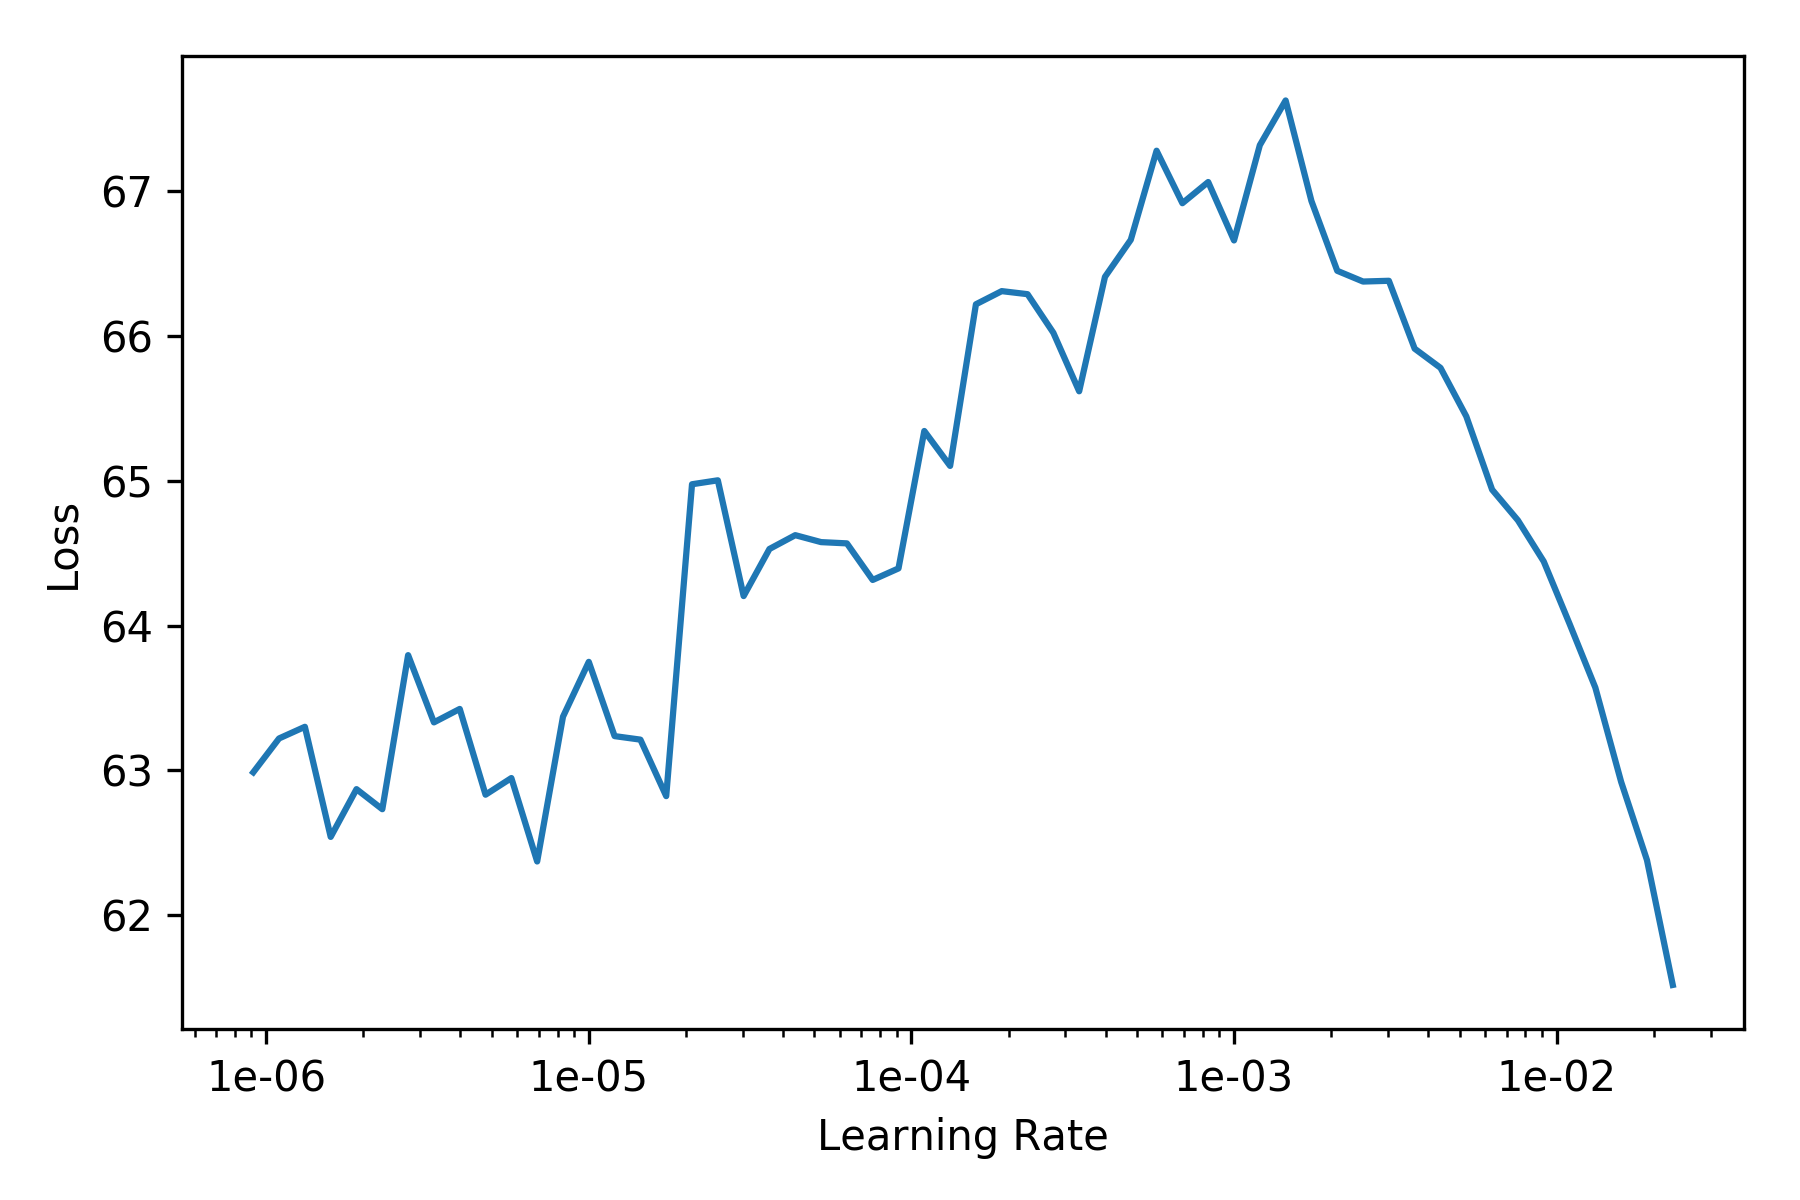

In [0]:
from IPython.display import Image
Image(filename="resources/taggers/example-ner/learning_rate.png", width=400, height=300)

In [0]:
# 7. start training
trainer.train('resources/taggers/example-ner',
              learning_rate=3e-02,
              mini_batch_size=128,
              max_epochs=150,
              weight_decay=1e-4,
              momentum=0.9
             )

2019-08-02 02:48:17,028 ----------------------------------------------------------------------------------------------------
2019-08-02 02:48:17,030 Evaluation method: MICRO_F1_SCORE
2019-08-02 02:48:17,438 ----------------------------------------------------------------------------------------------------
2019-08-02 02:48:32,385 epoch 1 - iter 0/21 - loss 11.12738800
2019-08-02 02:48:59,723 epoch 1 - iter 2/21 - loss 8.79154126
2019-08-02 02:49:32,262 epoch 1 - iter 4/21 - loss 8.74328012
2019-08-02 02:50:04,345 epoch 1 - iter 6/21 - loss 7.94722346
2019-08-02 02:50:50,134 epoch 1 - iter 8/21 - loss 7.71667380
2019-08-02 02:51:51,993 epoch 1 - iter 10/21 - loss 7.54550652
2019-08-02 02:52:52,835 epoch 1 - iter 12/21 - loss 7.65263829
2019-08-02 02:53:22,728 epoch 1 - iter 14/21 - loss 7.79148388
2019-08-02 02:54:04,675 epoch 1 - iter 16/21 - loss 7.73273274
2019-08-02 02:54:31,254 epoch 1 - iter 18/21 - loss 7.52579902
2019-08-02 02:54:51,802 epoch 1 - iter 20/21 - loss 8.16381743
201

{'dev_loss_history': [tensor(6.5547, device='cuda:0'),
  tensor(4.2726, device='cuda:0'),
  tensor(7.2188, device='cuda:0'),
  tensor(3.1296, device='cuda:0'),
  tensor(3.0820, device='cuda:0'),
  tensor(3.1771, device='cuda:0'),
  tensor(2.4543, device='cuda:0'),
  tensor(4.4612, device='cuda:0'),
  tensor(2.4388, device='cuda:0'),
  tensor(2.0971, device='cuda:0'),
  tensor(2.4933, device='cuda:0'),
  tensor(3.2575, device='cuda:0'),
  tensor(1.9793, device='cuda:0'),
  tensor(2.7635, device='cuda:0'),
  tensor(2.4753, device='cuda:0'),
  tensor(1.7146, device='cuda:0'),
  tensor(1.8990, device='cuda:0'),
  tensor(2.1664, device='cuda:0'),
  tensor(1.6913, device='cuda:0'),
  tensor(1.7751, device='cuda:0'),
  tensor(1.9212, device='cuda:0'),
  tensor(1.8186, device='cuda:0'),
  tensor(1.8547, device='cuda:0'),
  tensor(2.8579, device='cuda:0'),
  tensor(1.6877, device='cuda:0'),
  tensor(2.0999, device='cuda:0'),
  tensor(2.0723, device='cuda:0'),
  tensor(1.6435, device='cuda:0'),


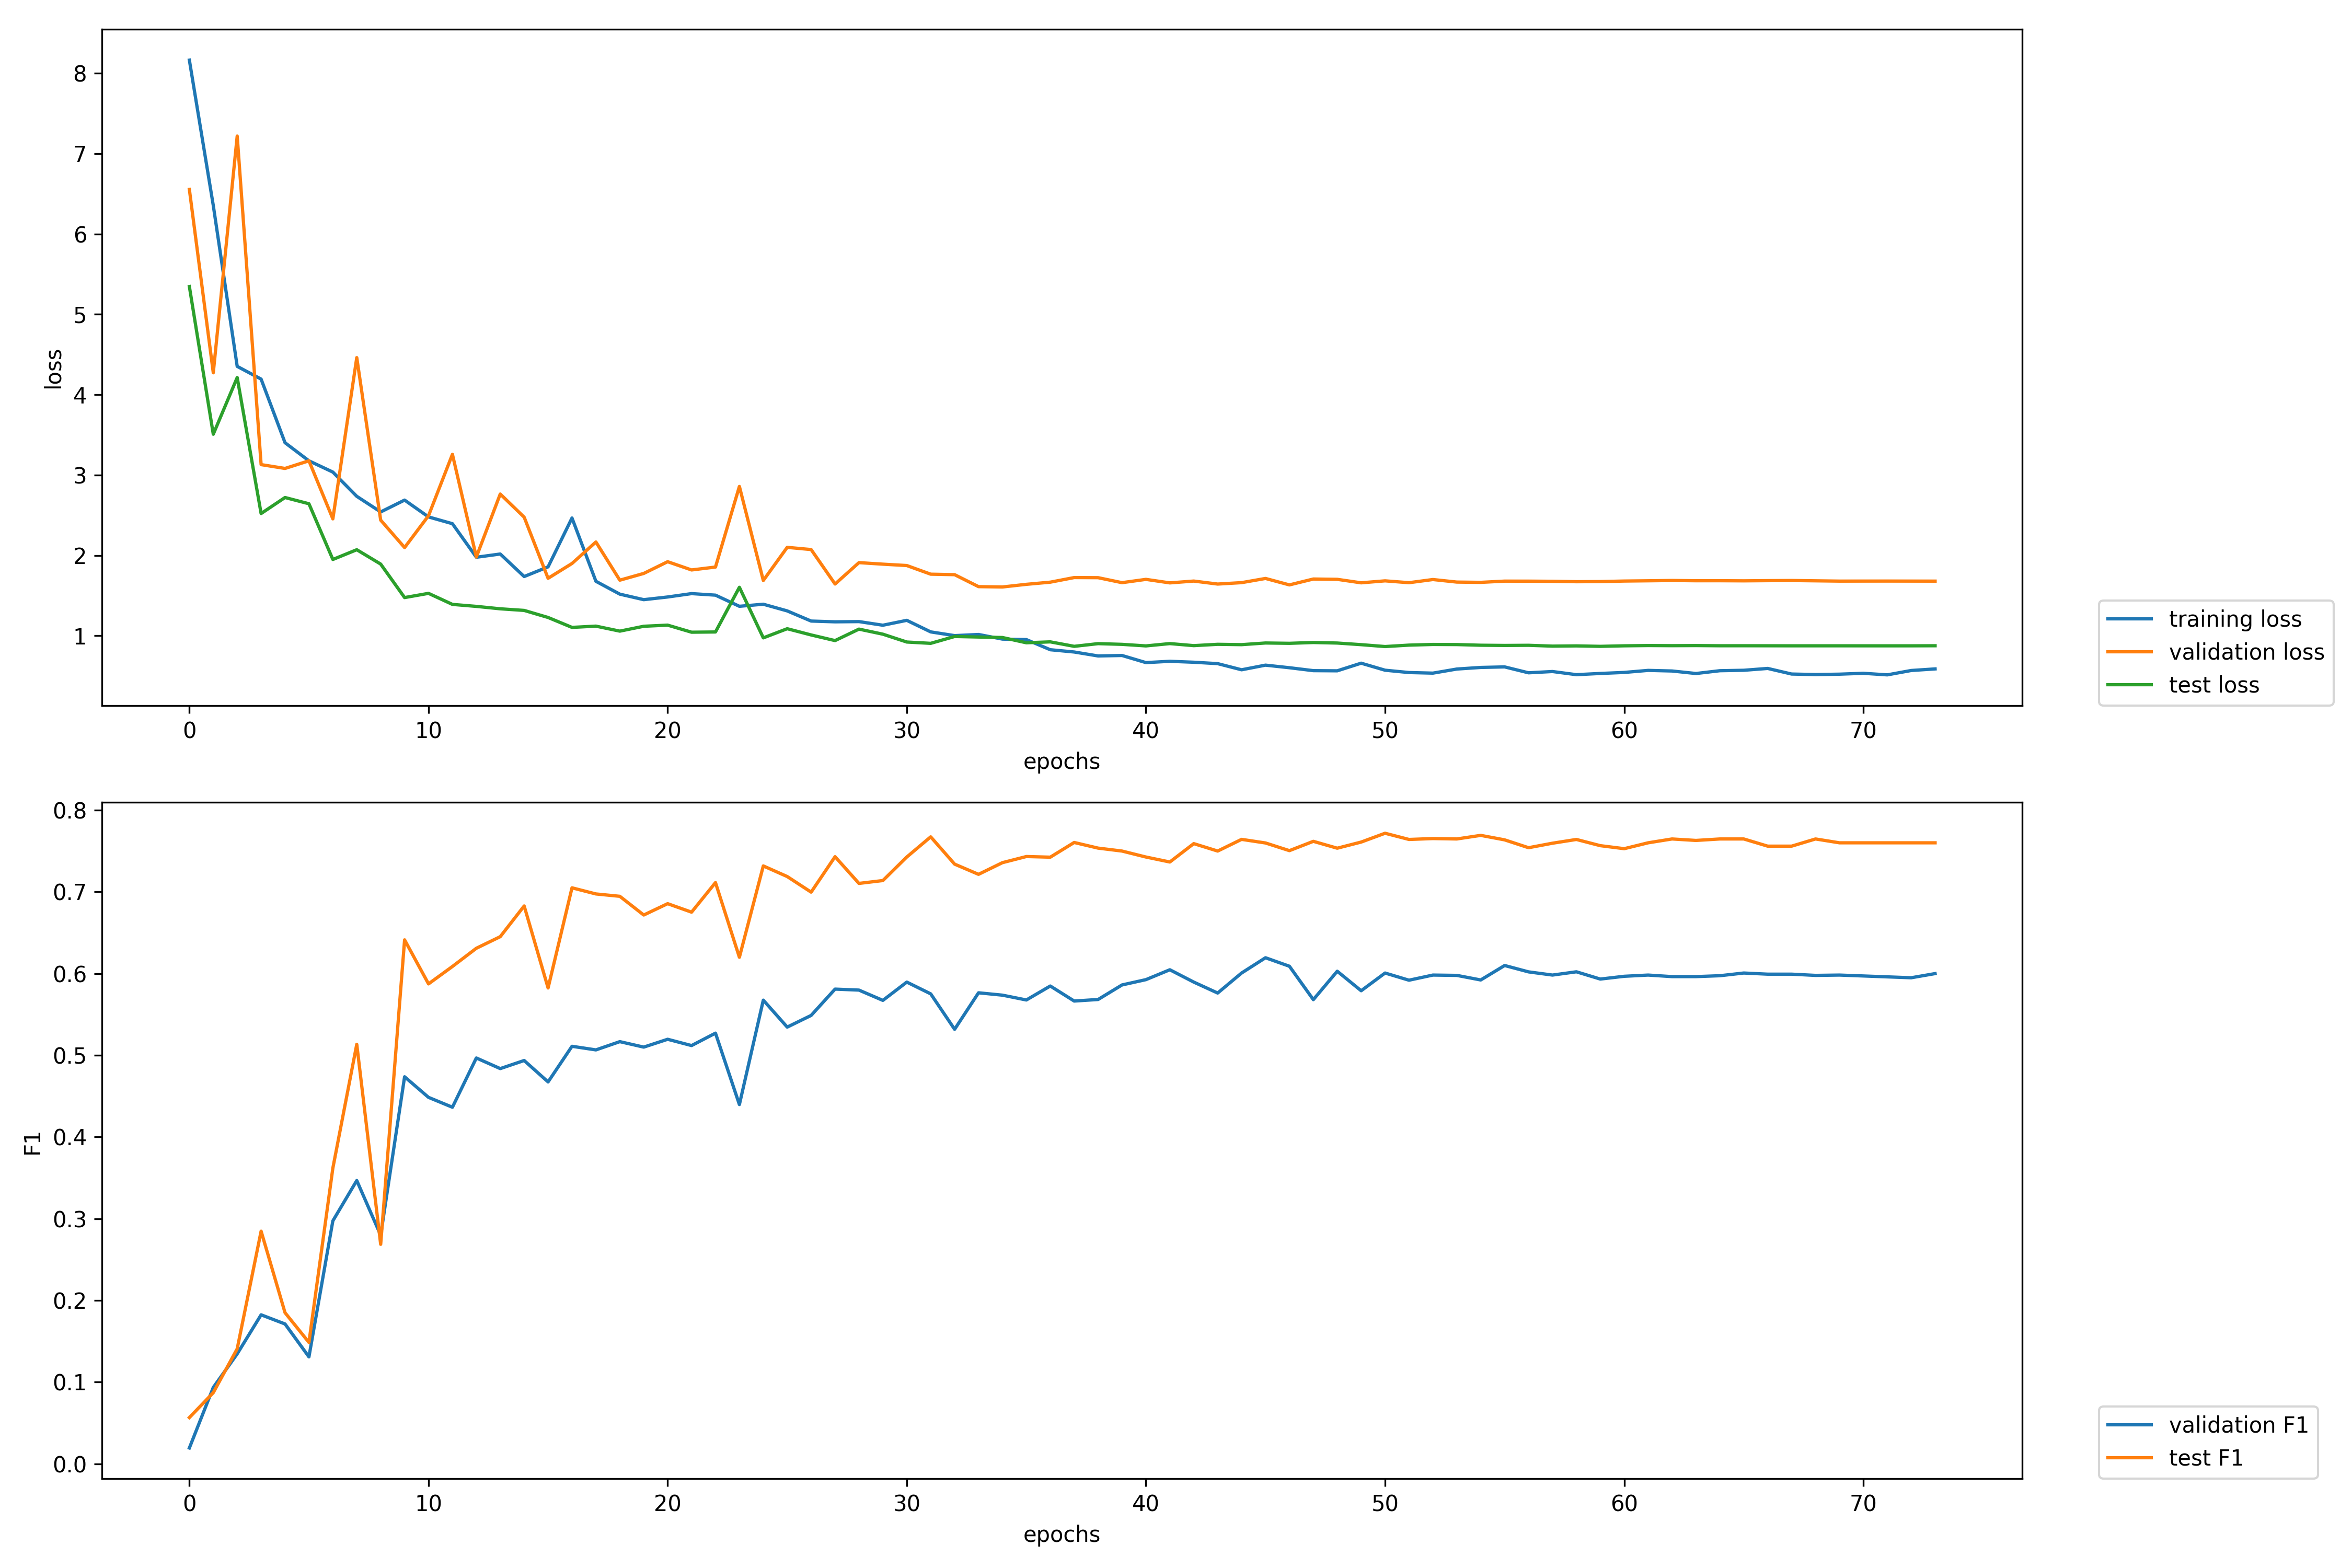

In [0]:
# 8. plot training curves (optional)
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_training_curves('resources/taggers/example-ner/loss.tsv')
Image(filename="resources/taggers/example-ner/training.png", width=800, height=600)


In [0]:
#plotter.plot_weights('resources/taggers/example-ner/weights.txt')
#Image(filename="resources/taggers/example-ner/weights.png")

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cp resources/taggers/example-ner/best-model.pt /content/gdrive/"My Drive"/

In [0]:
!ls  /content/gdrive/"My Drive"/*pt

'/content/gdrive/My Drive/best-model.pt'


**Inference - Code**

In [0]:
!pip install flair -q
!pip install allennlp -q

     |████████████████████████████████| 5.7MB 1.4MB/s 


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from flair.data import Sentence
from flair.models import SequenceTagger
tagger = SequenceTagger.load('/content/gdrive/My Drive/best-model.pt')

2019-08-09 13:12:13,798 loading file /content/gdrive/My Drive/best-model.pt


In [0]:
sentence = Sentence('DELHI PSYCHIATRY JOURNAL Vol. 18 No. 1 APRIL 2015 Delhi Psychiatry Journal 2015; 18:(1) © Delhi Psychiatric Society 206 Introduction Stevens-Johnson syndrome (SJS) is a muco- cutaneous disorder that was first described in 1922 1 . Stevens-Johnson syndrome (SJS), defined by widespread blisters arising in macules and/or flat atypical targets-shaped lesions, is a condition with homogenous clinical characteristics and a potentially lethal outcome. SJS is usually associated with some types of anticonvulsants, including carbamazepine, Phenobarbital, Phenytoin and Valproic acid. 2 SJS has been noted with other psychotropic medications like Lamotrigine. 3 However, cutaneous adverse drug eruptions are rarely noticed with atypical antipsychotics. To date, very few skin rashes and eruptions with Olanzapine have been described in the literature. Dermatological side effects that have been reported with Olanza- pine are eruptive xanthomas, skin hyperpimentation and pupura associated with thrombocytopenia 4 . Amongst other atypical antipsychotics, only two cases of erythema multiforme have been reported, one with Ziprasidone 5 and one with Risperidone 6 . We describe what we consider the first case of SJS induced by olanzapine. Case Report A 30 years old male presented to the Out Patient Department with complaints of talking out of context, destructive and wandersome behavior, irritability, poor self care and poor sleep for past 1 week. On examination he was found to have poor eye contact and rapport, irrelevant speech, irritable mood, shallow inappropriate affect, persecutory ideas with no perceptual disturbances with impaired judgment and grade I insight. He was provisionally diagnosed as a case of Acute polymorphic psychotic disorder without symptoms of Schizophrenia (F23.0) according to ICD-10. Treatment was initiated with olanzapine 10 mg/ Case Report Olanzapine induced Stevens-Johnson Syndrome Soumik Sengupta, Dhruba J. Chetia, Subhashish Nath, Bondona Timungpi Department of Psychiatry, LGB Regional Institute of Mental Health, Tezpur Contact : Subhashish Nath, E-mail: subhashish.n@gmail.com day gradually escalated to 20 mg/day after 5days. On the 6th day of using the medicine, he developed mild grade fever, headache, myalgia and lethargy. On the 8th day of using the medicine, he developed erythema of nose and pruritic macules &amp; patches over his body which was increasing day by day and started to form exfoliation over hands, ulceration and crusting on legs and lips. Scaling of the lesions was also noted over legs, ears and face which peel off on rubbing. The lesions initially appeared in the extremities then involved the trunk, face and also the mucous membrane of mouth and conjunctiva (Figure-1). Observing the skin eruptions the family members stopped the medicine following which the skin lesions began to subside but the psychotic symptoms started to reappear. The family members restarted Olanzapine and within three days the healed skin lesions again started to flare up. The patient then visited us and we suspected it to be a case of Olanzapine induced hypersensitivity reaction and changed the drug to Trifluoperazine. We referred Figure 1: Varied Lesions involving multiple skin and mucosal surfaces. (a) Hyperaemia of conjunctiva; (b) Crusting of lip; (c) Vesicle, ulceration &amp; crusting over leg; (d) Macule, patches and exfoliation over hands. APRIL 2015 DELHI PSYCHIATRY JOURNAL Vol. 18 No. 1 Delhi Psychiatry Journal 2015; 18:(1) © Delhi Psychiatric Society 207 the patient to a dermatologist. When he came for follow-up after a month, all lesions had disappeared and he became completely asymptomatic. He received a clinical diagnosis of Stevens Johnson syndrome from the dermatologist and was treated with oral prednisolone for 2 weeks, which was started on the same day of his visit to us and in the subsequent follow up, the skin lesions were healed and also the patient was symptomatically better. Discussion The emergence of extensive skin lesions is a rare side effect with olanzapine. The rapid onset upon reintroduction and reversibility of the skin rashes following discontinuation of Olanzapine suggests a causal link. To establish this strength of association, we have used the Naranjo Nomogram 7 for adverse drug reaction scale which scored a total of ‘8’ indicating “probable cause”. However we could not perform the skin biopsy as the patient was not cooperative. Patients suffering from SJS usually have prodromal symptoms and signs including fever, cough, sore throat, headache, vomiting, myalgia, polyarthralgia, diarrhea and lethargy. These symptoms occur about 1 to 14 days before mucocutaneous lesions appearance. 8 The reported patient had prodromal symptoms like fever, headache, myalgia and lethargy, which preceded mucocutaneous lesions by 2 days. About 90% of patients suffering from SJS or Toxic Epidermal Necrolysis (TEN) have a mucosal lesions that usually precede cutaneous symptoms. The buccal mucosa, hard and soft palate and vermilion border of the lips are the most often affected. In our case mucosal lesions appeared simultaneously with skin lesions and were limited to buccal mucosa and vermilion border of the lips. Our patient was started on a relatively higher initial dose of Olanzaine at 10 mg per day which was hiked to 20 mg by the 5th day of treatment. Considering the fact that symptoms started appearing on the 6th day of therapy, it may be suggested that rapid escalation of dose of Olanzapine may have played a contributory role in the evolution of the syndrome. Reports with Lamotrigine support such a possibility. 3 The pathogenesis of these diseases has not yet been established. Dysregulation of the immunologic reaction is thought to be one of the most important causes. The death of keratino- cytes due to apoptosis is currently thought to be the major mechanism. 9 The effect of antipsychotic medications on the immune system is currently being explored and preliminary results indicate that Olanzapine can alter the cytokine system in the body. 10 Conclusion To our knowledge, this may be the first report to link Olanzapine with a life threatening adverse drug reaction SJS. Considering the wide use of Olanzapine, it is important that clinicians should be aware of the possibility of SJS occurring during its use. ')
tagger.predict(sentence)

print('The following NER tags are found:')

# iterate over entities and print
for entity in sentence.get_spans('ner'):
    print(entity)


The following NER tags are found:
JournalName-span [1,2,3]: "DELHI PSYCHIATRY JOURNAL"
VolumeOfPublication-span [4,5,6,7]: "Vol. 18 No. 1"
YearOfPublication-span [9]: "2015"
JournalName-span [10,11,12]: "Delhi Psychiatry Journal"
AgeOfPatient-span [180]: "30"
AgeUnitOfPatient-span [181]: "years"
GenderOfPatient-span [183]: "male"
ArticleTitle-span [273,274,275,276]: "Olanzapine induced Stevens-Johnson Syndrome"
ReporterFName-span [277]: "Soumik"
ReporterFName-span [279]: "Dhruba"
ReporterMName-span [280]: "J."
ReporterFName-span [282]: "Subhashish"
ReporterFName-span [284]: "Bondona"
ReporterLName-span [285]: "Timungpi"
ReporterInstitution-span [289,290,291,292,293,294]: "LGB Regional Institute of Mental Health,"
ReporterCity-span [295]: "Tezpur"
ReporterFName-span [298]: "Subhashish"
YearOfPublication-span [509]: "2015"
JournalName-span [510,511,512]: "DELHI PSYCHIATRY JOURNAL"
VolumeOfPublication-span [513,514,515,516]: "Vol. 18 No. 1"
JournalName-span [517,518,519]: "Delhi Psychiatr

In [0]:
a=sentence.get_spans('ner')
a.type()

AttributeError: ignored